# Handin exercise for week 5: Pandas

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/statistikbanken/api
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables' pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data' pt 2: get request and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.

In [3]:
#5. With data aggregation and data visualization answer the following questions:
#  1. What is the change in pct of divorced danes from 2008 to 2020?

import requests
import pandas as pd

def data_factory(url, savefile_name):
    """fetches data from external site and return panda data"""
  
    response = requests.get(url, savefile_name)
    
    # get the filename
    fname = response.headers['Content-Disposition'].split('=')[1]

    # write content to file
    if response.ok:  # status_code == 200:
        with open(savefile_name, 'wb') as f:
            f.write(response.content)   
    print('-----------------')
    print('Downloaded and saved to file {}'.format(savefile_name))

    data = pd.read_csv(savefile_name, delimiter=";")
    return data
  
#  2008: (428864/5475791)*100 = 7.8%
  
#  2020: (544588/5822763)*100 = 9,3%

# Change (544588-428864)*100/544588 = 21%

In [4]:
  # 2. Which of the 5 biggest cities has the highest percentage of 'Never Married'?

import requests
import pandas as pd

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=U&Tid=2020K1'

data = data_factory(url, "fiveBiggestCitiesNotmarried.csv")
data = data.drop(labels=range(0,2)) # sletter første to linier data
data = data[~data.OMRÅDE.str.contains('Region')] # fjerner linier med region
data = data.sort_values(by='INDHOLD', ascending=False)
data[0:5]

-----------------
Downloaded and saved to file fiveBiggestCitiesNotmarried.csv


,OMRÅDE,KØN,ALDER,CIVILSTAND,TID,INDHOLD
2,København,I alt,I alt,Ugift,2020K1,412512
84,Aarhus,I alt,I alt,Ugift,2020K1,208509
104,Aalborg,I alt,I alt,Ugift,2020K1,118194
58,Odense,I alt,I alt,Ugift,2020K1,112490
3,Frederiksberg,I alt,I alt,Ugift,2020K1,60781


-----------------
Downloaded and saved to file marritalChangesCPH2008to2020.csv


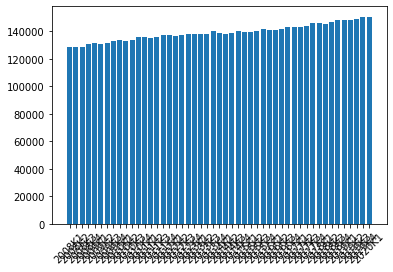

Chart show people married


In [5]:
  # 3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
import matplotlib.pyplot as plt

url="https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=G&Tid=*"

data3 = data_factory(url, "marritalChangesCPH2008to2020.csv")

fig = plt.figure()

plt.bar(data3["TID"], data3["INDHOLD"])
plt.xticks(rotation=45)
plt.show()
print("Chart show people married")

-----------------
Downloaded and saved to file marriedNotmarriedAllAges.csv


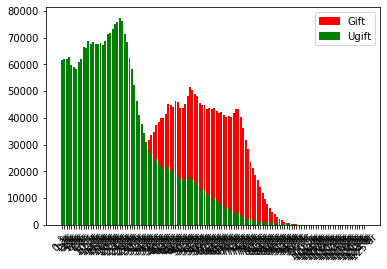

In [14]:
 # 4. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

url="https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT&ALDER=*&CIVILSTAND=U%2CG&Tid=2020K1"

data4 = data_factory(url, "marriedNotmarriedAllAges.csv")

data4 = data4[~data4.ALDER.str.contains('I alt')] # fjerner linier med "Hele landet"

gift = data4.loc[data4['CIVILSTAND'] == "Gift/separeret"] # udskiller gifte fra DataFrame
ugift = data4.loc[data4['CIVILSTAND'] == "Ugift"]         # udskiller ugifte fra DataFrame

fig = plt.figure()

plt.bar(gift["ALDER"], gift["INDHOLD"], color='red')      # laver bar graf af gifte
plt.bar(ugift["ALDER"], ugift["INDHOLD"], color='green')  # laver bar graf af ugifte

# legend
red_patch = mpatches.Patch(color='red', label='Gift')
green_patch = mpatches.Patch(color='green', label='Ugift')
plt.legend(handles=[red_patch, green_patch])
plt.xticks(rotation=45)

plt.show()


## Ex2 Use another table
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

Hver er der flest af i 2020: kvinder eller mænd
Mænd 2492298
Kvinder 2523296


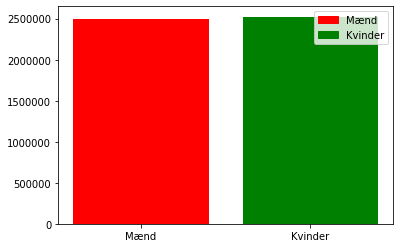

In [110]:
import pandas as pd 

#1
url="https://api.statbank.dk/v1/data/FOLK2/CSV?delimiter=Semicolon&ALDER=*&K%C3%98N=M%2CK&HERKOMST=*&STATSB=*&IELAND=5100&Tid=2020"

#2
print("Hvem er der flest af i 2020: kvinder eller mænd")

#3
dst1 = pd.read_csv(url, delimiter=";", encoding='utf-8')
mænd = dst1.loc[dst1['KØN'] == "Mænd"].sum()
kvinder = dst1.loc[dst1['KØN'] == "Kvinder"].sum()

print("Mænd", mænd["INDHOLD"])
print("Kvinder", kvinder["INDHOLD"])

#4
fig = plt.figure()
plt.bar("Mænd", mænd["INDHOLD"], color='red')
plt.bar("Kvinder", kvinder["INDHOLD"], color='green')
red_patch = mpatches.Patch(color='red', label='Mænd')
green_patch = mpatches.Patch(color='green', label='Kvinder')
plt.legend(handles=[red_patch, green_patch])
plt.show()


Hvor stor er befolkningsstørrelsen fra 1980 til 2020


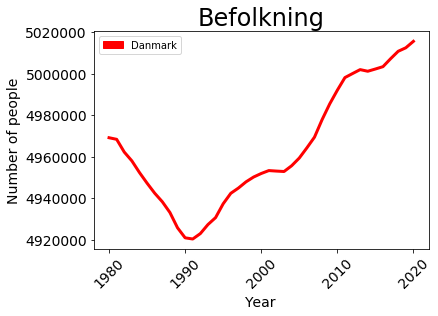

In [10]:
import pandas as pd 

#1
url="https://api.statbank.dk/v1/data/FOLK2/CSV?delimiter=Semicolon&ALDER=*&K%C3%98N=*&HERKOMST=*&STATSB=*&IELAND=5100&Tid=*"
dst2 = pd.read_csv(url, delimiter=";", encoding='utf-8')
#print(dst2)

#2
print("Hvor stor er befolkningsstørrelsen fra 1980 til 2020")

#3
folkens = []
for year in range(1980, 2021):
    folkens.append(dst2.loc[dst2['TID'] == year].sum()["INDHOLD"])

#4
plt.figure()
plt.plot(range(1980,2021), folkens,  linewidth=3, color='red')
# Set chart title and label axes. 
plt.title("Befolkning", fontsize=24)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
# Set size of tick labels.
plt.tick_params(axis='both', labelsize=14)
plt.xticks(rotation=45)
red_patch = mpatches.Patch(color='red', label='Danmark')
plt.legend(handles=[red_patch])
plt.show()


In [97]:
import pandas as pd 
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1B,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, statsborgerskab, tid]"
2,FOLK1C,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, herkomst, oprindelsesland..."
3,FOLK1D,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, statsborgerskab, tid]"
4,FOLK1E,Folketal den 1. i kvartalet,antal,2020-02-11T08:00:00,2008K1,2020K1,True,"[område, køn, alder, herkomst, tid]"
5,FOLK2,Folketal 1. januar,antal,2020-02-11T08:00:00,1980,2020,True,"[alder, køn, herkomst, statsborgerskab, oprind..."
6,FOLK3,Folketal 1. januar,antal,2020-02-11T08:00:00,2008,2020,True,"[fødselsdag, fødselsmåned, fødselsår, tid]"
7,FT,Folketal (summariske tal fra folketællinger),antal,2020-02-11T08:00:00,1769,2020,True,"[hovedlandsdele, tid]"
8,BEF5F,Personer født på Færøerne og bosat i Danmark 1...,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"
9,BEF5G,Personer født i Grønland og bosat i Danmark 1....,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"
